# **Read DATA**

*****************************
Please make sure you use the same gpu shown below : 
*****************************

In [ ]:
!nvidia-smi

Wed Dec  2 13:11:39 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.38       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8    10W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

*********************
Please upload your kaggle json : you can find it in your profile 
*********************

In [ ]:
from google.colab import files
!pip install -q kaggle
files.upload() #kaggle.json file downloaded from api
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

Saving kaggle.json to kaggle.json


In [ ]:
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d ttahara/pytorch-pfn-extras
!unzip pytorch-pfn-extras.zip -d  pytorch-pfn-extras


pytorch-pfn-extras.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  pytorch-pfn-extras.zip
  inflating: pytorch-pfn-extras/pytorch-pfn-extras-0.3.1/PKG-INFO  
  inflating: pytorch-pfn-extras/pytorch-pfn-extras-0.3.1/README.md  
  inflating: pytorch-pfn-extras/pytorch-pfn-extras-0.3.1/pytorch_pfn_extras.egg-info/PKG-INFO  
  inflating: pytorch-pfn-extras/pytorch-pfn-extras-0.3.1/pytorch_pfn_extras.egg-info/SOURCES.txt  
  inflating: pytorch-pfn-extras/pytorch-pfn-extras-0.3.1/pytorch_pfn_extras.egg-info/dependency_links.txt  
  inflating: pytorch-pfn-extras/pytorch-pfn-extras-0.3.1/pytorch_pfn_extras.egg-info/requires.txt  
  inflating: pytorch-pfn-extras/pytorch-pfn-extras-0.3.1/pytorch_pfn_extras.egg-info/top_level.txt  
  inflating: pytorch-pfn-extras/pytorch-pfn-extras-0.3.1/pytorch_pfn_extras/__init__.py  
  inflating: pytorch-pfn-extras/pytorch-pfn-extras-0.3.1/pytorch_pfn_extras/_version.py  
  inflating: pytorch-pfn-extras/pytorch-

In [ ]:
%%bash
pip install /content/pytorch-pfn-extras/pytorch-pfn-extras-0.3.1

Processing ./pytorch-pfn-extras/pytorch-pfn-extras-0.3.1
  Created wheel for pytorch-pfn-extras: filename=pytorch_pfn_extras-0.3.1-cp36-none-any.whl size=99756 sha256=573f6406749aecf1125a244e8cddb785525f435a92d3320670c122d83b724f73
  Stored in directory: /root/.cache/pip/wheels/ad/71/c5/c3160f7184b3a8562729fde266c86eea7594161ddec85ad01a
Successfully built pytorch-pfn-extras


In [ ]:
import os
import cv2
import sys
import time
import math

import random
import librosa
import warnings
#import torchaudio
#import torchvision
import numpy as np
import pandas as pd
import typing as tp
import IPython.display as ipd
import matplotlib.pyplot as plt

from pathlib import Path
from collections import Counter

import torch
import torch.nn as nn
import torch.utils.data as data
import torch.nn.functional as F

from torch.utils.data import DataLoader
from torch.nn.modules.utils import _pair
from torch.nn import Conv2d, Module, Linear, BatchNorm2d, ReLU


pd.options.display.max_rows = 500
pd.options.display.max_columns = 500

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
path="/content/drive/MyDrive/Zindi/Competitions/GIZ"

In [ ]:
def seed_everything(seed):
    """
    Seeds basic parameters for reproductibility of results
    
    Arguments:
        seed {int} -- Number of the seed
    """
    random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False #False

In [ ]:
SEED_VAL = 1213
seed_everything(SEED_VAL)

In [ ]:
!cp "/content/drive/My Drive/Zindi/Competitions/GIZ/Train.csv" .
!cp "/content/drive/My Drive/Zindi/Competitions/GIZ/SampleSubmission.csv" .
!cp "/content/drive/My Drive/Zindi/Competitions/GIZ/audio_files.zip" .
!cp "/content/drive/My Drive/Zindi/Competitions/GIZ/AdditionalUtterances.zip" .
!cp "/content/drive/My Drive/Zindi/Competitions/GIZ/nlp_keywords_29Oct2020.zip" .

In [ ]:
!unzip AdditionalUtterances.zip 
!unzip audio_files.zip
!unzip nlp_keywords_29Oct2020.zip


Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: latest_keywords/ebisaanyi/3d43af6faf2244c288154dc4ff6a734f_34df793d29d44266adf25664e8c6dc03.wav  
  inflating: latest_keywords/omucungwa/2497942026ef4d7e97d47fc2738d7c27_45c35e9401a0409899981a0b96f1753a.wav  
  inflating: latest_keywords/ppaapaali/79aac18aacc74cc092d00778f7f323da_e932f971e74b4fd99c69a88b98464010.wav  
  inflating: latest_keywords/ekirwadde/3d43af6faf2244c288154dc4ff6a734f_e9125deee38442b5a183fb5ea8df15d7.wav  
  inflating: latest_keywords/omulimi/1b5a69c4b88b41eb9577a656e11bb7dd_78896821953949ab8c97f5a796aeb6d8.wav  
  inflating: latest_keywords/emboga/2497942026ef4d7e97d47fc2738d7c27_cda86edbc31044b995d13453f3d302f6.wav  
  inflating: latest_keywords/ekyeya/5aa4893526794a73a3ed0a7ebba2a7bf_6f0a37308160411da68c2ab09cd303f6.wav  
  inflating: latest_keywords/micungwa/0a8fccdb95b749dca0404bf433872764_65fb16ebbb724378b23d281d8673d0d2.wav  
  inflating: latest_keywords/ebikongoliro/0

In [ ]:
!rm AdditionalUtterances.zip
!rm audio_files.zip
!rm nlp_keywords_29Oct2020.zip

In [ ]:
train = pd.read_csv("Train.csv")

In [ ]:
def create_new_train():  
  import glob
  dirs = glob.glob('latest_keywords/*')
  new_atterances = pd.DataFrame()
  labels = []
  fn = []
  for dir in dirs:
    wav_paths = glob.glob(dir+'/*')
    fn.extend(wav_paths)
    labels.extend(len(wav_paths) * [dir.split('/')[-1]])
  new_atterances['fn'] = fn
  new_atterances['label'] = labels
  new_atterances = new_atterances.sample(frac=1,random_state=SEED_VAL).reset_index(drop=True)
  train = pd.read_csv('Train.csv')
  train = pd.concat([train,new_atterances])
  train = train.sample(frac=1,random_state=SEED_VAL).reset_index(drop=True)
  train.to_csv('new_train.csv',index=False)
  print(train.head())
create_new_train()
def create_new_train_1():  
  import glob
  dirs = glob.glob('nlp_keywords/*')
  new_atterances = pd.DataFrame()
  labels = []
  fn = []
  for dir in dirs:
    wav_paths = glob.glob(dir+'/*')
    fn.extend(wav_paths)
    labels.extend(len(wav_paths) * [dir.split('/')[-1]])
  new_atterances['fn'] = fn
  new_atterances['label'] = labels
  new_atterances = new_atterances.sample(frac=1,random_state=SEED_VAL).reset_index(drop=True)
  train = pd.read_csv('new_train.csv')
  train = pd.concat([train,new_atterances])
  train = train.sample(frac=1,random_state=SEED_VAL).reset_index(drop=True)
  train.to_csv('final_train.csv',index=False)
  print(train.head())

create_new_train_1()

                                                  fn      label
0  latest_keywords/ebisooli/771b5044334242fb9caff...   ebisooli
1                            audio_files/6QRKXIC.wav   ebikajjo
2                            audio_files/K4V0N40.wav   ebisooli
3                            audio_files/V9CM2BC.wav  obusaanyi
4  latest_keywords/ekisaanyi/744b1a437234489fae95...  ekisaanyi
                                                  fn     label
0                            audio_files/T76GMLD.wav    bulimi
1                            audio_files/H536AW2.wav       npk
2  nlp_keywords/muwogo/d027264654b94950aeb204f64d...    muwogo
3  latest_keywords/kikajjo/2497942026ef4d7e97d47f...   kikajjo
4  nlp_keywords/ennimiro/6fbfcce2cf21419e97290f9e...  ennimiro


In [ ]:
train = pd.read_csv("final_train.csv")

In [ ]:
train.shape

(4709, 2)

In [ ]:
sub = pd.read_csv("SampleSubmission.csv")

# **Parameters :**

In [ ]:
CLASSES = sub.columns[1:]
NUM_CLASSES = len(CLASSES)
NUM_WORKERS = 4

In [ ]:
CLASSES_CODE = {i:index for index,i in enumerate(CLASSES) }
INV_CLASSES_CODE = {v: k for k, v in CLASSES_CODE.items()}


In [ ]:
melspectrogram_parameters = {
        "sampling_rate": 16000,
        "duration" : 3.5,
        "n_mels": 32,
        "fmin": 20,## changed from 50  
        "fmax": 8000,
        "hop_length" : 100,  # to make width= 128
        "n_fft" : 512
    }

In [ ]:
!mkdir training_output

*********************************
**PS** : Please create a directory in your drive called resnest269 replace the output_dir with the location of your directory
*********************************



In [ ]:
settings_str = """
globals:

  seed: 1213
  device: cuda
  num_epochs: 15
  output_dir: /content/drive/MyDrive/Zindi/Competitions/GIZ/resnest269/
  use_fold: 0
  target_sr: 41000

dataset:
  name: SpectrogramDataset
  params:
    img_size: 64

    
split:
  name: StratifiedKFold
  params:
    n_splits: 10
    random_state: 42
    shuffle: True

loader:
  train:
    batch_size: 8
    shuffle: True
    num_workers: 2
    pin_memory: True
    drop_last: True
  val:
    batch_size: 32
    shuffle: False
    num_workers: 2
    pin_memory: True
    drop_last: False
  test:
    batch_size: 32
    shuffle: False
    num_workers: 2
    pin_memory: True
    drop_last: False

model:
  name: resnest269
  params:
    pretrained: True
    n_classes: 193

loss:
  name: CrossEntropyLoss
  params: {}

optimizer:
  name: Adam
  params:
    lr: 0.00008

scheduler:
  name: CosineAnnealingLR
  params:
    T_max: 5
"""

In [ ]:
import yaml
settings = yaml.safe_load(settings_str)

# **Save Melsepcs to Disque**

In [ ]:
def show_audio(ad):
    sig,sr = ad
    ipd.display(ipd.Audio(data=sig, rate=sr))

In [ ]:
def melspectogram_dB(file_path, cst=5, top_db=80.):
  row_sound, sr = librosa.load(file_path,sr=melspectrogram_parameters["sampling_rate"])
  sound = np.zeros((cst*sr,))

  if row_sound.shape[0] < cst*sr:
    sound[:row_sound.shape[0]] = row_sound[:]
  else:
    sound[:] = row_sound[:cst*sr]

  spec = librosa.feature.melspectrogram(sound, 
                                    sr=melspectrogram_parameters["sampling_rate"],
                                    n_mels=melspectrogram_parameters["n_mels"],
                                    hop_length=melspectrogram_parameters["hop_length"],
                                    n_fft=melspectrogram_parameters["n_fft"],
                                    fmin=melspectrogram_parameters["fmin"],
                                    fmax=melspectrogram_parameters["fmax"])
  spec_db = librosa.power_to_db(spec)
  spec_db = spec_db.astype(np.float32)

  return spec_db
  
  
def spec_to_image(spec, eps=1e-6):
  mean = spec.mean()
  std = spec.std()
  spec_norm = (spec - mean) / (std + eps)
  spec_min, spec_max = spec_norm.min(), spec_norm.max()
  spec_img = 255 * (spec_norm - spec_min) / (spec_max - spec_min)
  
  return spec_img.astype(np.uint8)



def save_spec_image(spec_img, fname):
  cv2.imwrite(fname, spec_img)

In [ ]:
# Add file names
from tqdm import tqdm
def add_file_name(train=train,submission=sub) : 
  train['spec_name'] = 'Imgs/Train/'+train['fn'].apply(lambda x : x.split('/')[-1].split('.')[0])+'.png'

  submission['spec_name'] = 'Imgs/Test/'+submission['fn'].apply(lambda x : x.split('/')[-1].split('.')[0])+'.png'
  return train , submission

In [ ]:
train , submission = add_file_name(train=train,submission=sub)

In [ ]:
#Placeholder for the training and test spectogram's images
#It is going to store the spec, we will shortly generate.
os.makedirs('Imgs/Train/', exist_ok=True)
os.makedirs('Imgs/Test/', exist_ok=True)

In [ ]:
train.loc[1,'spec_name']

'Imgs/Train/H536AW2.png'

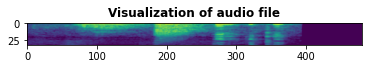

In [ ]:
spec = melspectogram_dB(train.loc[1,'fn'], 3)

plt.figure(figsize=(6,10))
plt.title('Visualization of audio file', weight='bold')
plt.imshow(spec)

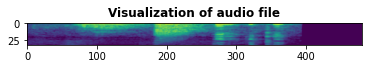

In [ ]:
spec = melspectogram_dB(train.loc[1,'fn'], 3)

plt.figure(figsize=(6,10))
plt.title('Visualization of audio file', weight='bold')
plt.imshow(spec)
img = spec_to_image(spec)


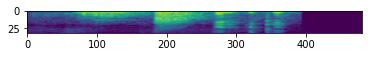

In [ ]:
plt.imshow(img)

In [ ]:
#Training specs
for row in tqdm(train.values):
  sound_path = row[0] #this corresponds to 'file_name'
  spec_name = row[2] #this corresponds to 'spec_name'

  spec = melspectogram_dB(sound_path, 3)
  spec = spec_to_image(spec)
  save_spec_image(spec, spec_name)

100%|██████████| 4709/4709 [20:26<00:00,  3.84it/s]


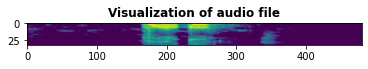

In [ ]:
plt.figure(figsize=(6,10))
plt.title('Visualization of audio file', weight='bold')
plt.imshow(spec)

In [ ]:
#Training specs
for row in tqdm(submission.values):
  sound_path = row[0] #this corresponds to 'file_name'
  spec_name = row[-1] #this corresponds to 'spec_name'

  spec = melspectogram_dB(sound_path, 3)
  spec = spec_to_image(spec)
  save_spec_image(spec, spec_name)

100%|██████████| 1017/1017 [03:34<00:00,  4.75it/s]


# **DataSet Building :**

In [ ]:
import albumentations
from albumentations.core.transforms_interface import DualTransform, BasicTransform


In [ ]:
class AudioTransform(BasicTransform):
    """Transform for Audio task"""

    @property
    def targets(self):
        return {"data": self.apply}
    
    def update_params(self, params, **kwargs):
        if hasattr(self, "interpolation"):
            params["interpolation"] = self.interpolation
        if hasattr(self, "fill_value"):
            params["fill_value"] = self.fill_value
        return params


In [ ]:
class MelSpectrogram(AudioTransform):
    """Shifting time axis"""
    def __init__(self, parameters, always_apply=False, p=0.5):
        super(MelSpectrogram, self).__init__(always_apply, p)

        self.parameters = parameters
    
    def apply(self, data, **params):
        sound, sr = data

        melspec = librosa.feature.melspectrogram(sound, sr=sr, **self.parameters)
        melspec = librosa.power_to_db(melspec)
        melspec = melspec.astype(np.float32)

        return melspec, sr

In [ ]:
audio_augmentation_train = albumentations.Compose([
     MelSpectrogram(parameters=melspectrogram_parameters,always_apply=True),
])
audio_augmentation_valid = albumentations.Compose([
     MelSpectrogram(parameters=melspectrogram_parameters,always_apply=True),
])

In [ ]:
import matplotlib.pyplot as plt
import imageio
import cv2

class SpectrogramDataset(data.Dataset):
    def __init__(
        self,
        file_list: tp.List[tp.List[str]], img_size=224,
        waveform_transforms=None, spectrogram_transforms=None, melspectrogram_parameters={},
        train_bool = True
    ):
        self.file_list = file_list  # list of list: [file_path, Class_code]
        self.img_size = img_size
        self.waveform_transforms = waveform_transforms
        self.spectrogram_transforms = spectrogram_transforms
        self.melspectrogram_parameters = melspectrogram_parameters
        self.train_bool = train_bool

    def __len__(self):
        return len(self.file_list)

    def __getitem__(self, idx: int):
        #wav_path, word_code = self.file_list[idx]
        if self.train_bool:
          melspec_path, word_code = self.file_list[idx]
        else: 
          melspec_path = self.file_list[idx]

        image = cv2.imread(melspec_path,cv2.IMREAD_GRAYSCALE)                    
        height, width = image.shape

        image = cv2.resize(image, (int(width * self.img_size / height), self.img_size))


        labels = 0

        if self.train_bool:
          labels = CLASSES_CODE[word_code[0]]
          return image, labels
        else:
          return image

In [ ]:
def get_loaders_for_training(
    args_dataset: tp.Dict, args_loader: tp.Dict,
    train_file_list: tp.List[str], val_file_list: tp.List[str]
):

    # # make dataset
    train_dataset = SpectrogramDataset(train_file_list,spectrogram_transforms=audio_augmentation_train, **args_dataset)
    val_dataset = SpectrogramDataset(val_file_list,spectrogram_transforms=audio_augmentation_valid, **args_dataset)
    # # make dataloader
    train_loader = data.DataLoader(train_dataset, **args_loader["train"])
    val_loader = data.DataLoader(val_dataset, **args_loader["val"])
    
    return train_loader, val_loader

# **Modeling :**

In [ ]:
def get_model(args: tp.Dict):
  
    # get list of models
    torch.hub.list('zhanghang1989/ResNeSt', force_reload=True)
    # load pretrained models, using ResNeSt-50 as an example
    model = torch.hub.load('zhanghang1989/ResNeSt', args["name"], pretrained = args["params"]["pretrained"])
    
    weight_new = model.conv1[0].weight
    conv2_new =  Conv2d(1, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False) 
    
    model.conv1[0] = conv2_new
    model.conv1[0].weight = torch.nn.Parameter(model.conv1[0].weight.sum(dim=1, keepdim=True))
       

    del model.fc
   
    # # use the same head as the baseline notebook.
    
    model.fc = nn.Sequential(
        nn.Linear(2048, args["params"]["n_classes"]))
    
    
    return model

In [ ]:
def train_loop(
    manager, args, model, device,
    train_loader, optimizer, scheduler, loss_func
):
    """Run minibatch training loop"""
    while not manager.stop_trigger:
        model.train()
        progress_bar = tqdm_notebook(train_loader)
        for batch_idx, (data, target) in enumerate(progress_bar):
            with manager.run_iteration():
               
                data = data.type(torch.FloatTensor)

                data, target = data.to(device, dtype=torch.float), target.to(device,dtype=torch.long)
                
                optimizer.zero_grad()

                output = model(data.unsqueeze(dim=1))
                loss = loss_func(output, target)
                progress_bar.set_description(f'train/loss: {loss.item():.6f}')
                ppe.reporting.report({'train/loss': loss.item()})
                loss.backward()
                optimizer.step()
            if scheduler : 
              scheduler.step()

def eval_for_batch(
    args, model, device,
    data, target, loss_func, eval_func_dict={}
):
    """
    Run evaliation for valid
    
    This function is applied to each batch of val loader.
    """
    model.eval()
    data = data.type(torch.FloatTensor)
    data, target = data.to(device, dtype=torch.float), target.to(device,dtype=torch.long)
    output = model(data.unsqueeze(dim=1))
    # Final result will be average of averages of the same size
    val_loss = loss_func(output, target).item()
    ppe.reporting.report({'val/loss': val_loss})
    
    for eval_name, eval_func in eval_func_dict.items():
        eval_value = eval_func(output, target).item()
        ppe.reporting.report({"val/{}".format(eval_name): eval_value})

In [ ]:
def set_extensions(
    manager, args, model, device, test_loader, optimizer,
    loss_func,fold, eval_func_dict={},
    
):
    """set extensions for PPE"""
    use_fold = fold     
    my_extensions = [
        # # observe, report
        ppe_extensions.observe_lr(optimizer=optimizer),
        # ppe_extensions.ParameterStatistics(model, prefix='model'),
        # ppe_extensions.VariableStatisticsPlot(model),
        ppe_extensions.LogReport(),
        ppe_extensions.PlotReport(['train/loss', 'val/loss'], 'epoch', filename='loss.png'),
        ppe_extensions.PlotReport(['lr',], 'epoch', filename='lr.png'),
        ppe_extensions.PrintReport([
            'epoch', 'iteration', 'lr', 'train/loss', 'val/loss', "elapsed_time"]),
#         ppe_extensions.ProgressBar(update_interval=100),

        # # evaluation
        (
            ppe_extensions.Evaluator(
                test_loader, model,
                eval_func=lambda data, target:
                    eval_for_batch(args, model, device, data, target, loss_func, eval_func_dict),
                progress_bar=True),
            (1, "epoch"),
        ),
        # # save model snapshot.
        (
            ppe_extensions.snapshot(
                target=model, filename=f"best_fold_{use_fold}.pth"),
            ppe.training.triggers.MinValueTrigger(key="val/loss", trigger=(1, 'epoch'))
        ),
        
        
    ]
           
    # # set extensions to manager
    for ext in my_extensions:
        if isinstance(ext, tuple):
            manager.extend(ext[0], trigger=ext[1])
        else:
            manager.extend(ext)
        
    return manager

# **Get WAVs**

In [ ]:
train.head()

,fn,label,spec_name
0,audio_files/T76GMLD.wav,bulimi,Imgs/Train/T76GMLD.png
1,audio_files/H536AW2.wav,npk,Imgs/Train/H536AW2.png
2,nlp_keywords/muwogo/d027264654b94950aeb204f64d...,muwogo,Imgs/Train/d027264654b94950aeb204f64d05d8d7_c5...
3,latest_keywords/kikajjo/2497942026ef4d7e97d47f...,kikajjo,Imgs/Train/2497942026ef4d7e97d47fc2738d7c27_42...
4,nlp_keywords/ennimiro/6fbfcce2cf21419e97290f9e...,ennimiro,Imgs/Train/6fbfcce2cf21419e97290f9e12934f65_aa...


In [ ]:
from sklearn.model_selection import StratifiedKFold


In [ ]:
skf = StratifiedKFold(**settings["split"]["params"])

train["fold"] = -1
for fold_id, (train_index, val_index) in enumerate(skf.split(train, train["label"])):
    train.iloc[val_index, -1] = fold_id
    
# # check the propotion
fold_proportion = pd.pivot_table(train, index="label", columns="fold", aggfunc=len)
print(fold_proportion.shape)

(193, 20)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


In [ ]:
use_fold = settings["globals"]["use_fold"]
train_file_list = train.query("fold != @use_fold")[["spec_name", "label"]].values.tolist()
val_file_list = train.query("fold == @use_fold")[["spec_name", "label"]].values.tolist()

print("[fold {}] train: {}, val: {}".format(use_fold, len(train_file_list), len(val_file_list)))

[fold 0] train: 4238, val: 471


In [ ]:
#transform lists to list of lists
for i in range(len(train_file_list)):
    train_file_list[i][1] = [train_file_list[i][1]]
for i in range(len(val_file_list)):
    val_file_list[i][1] = [val_file_list[i][1]]

# **HOLDOUT**

In [ ]:
pip install pysoundfile

In [ ]:
!apt-get install ffmpeg

Reading package lists... Done
Building dependency tree       
Reading state information... Done
ffmpeg is already the newest version (7:3.4.8-0ubuntu0.2).
0 upgraded, 0 newly installed, 0 to remove and 14 not upgraded.


In [ ]:
import os
import gc
import time
import shutil
import random
import warnings
import typing as tp
from pathlib import Path
from contextlib import contextmanager

import yaml
from joblib import delayed, Parallel

import cv2
import librosa
import audioread
import soundfile as sf

import numpy as np
import pandas as pd

from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as data

import pytorch_pfn_extras as ppe
from pytorch_pfn_extras.training import extensions as ppe_extensions

from tqdm import tqdm, tqdm_notebook


pd.options.display.max_rows = 500
pd.options.display.max_columns = 500

In [ ]:
seed_everything(settings["globals"]["seed"])
device = torch.device(settings["globals"]["device"])
output_dir = Path(settings["globals"]["output_dir"])

# # # get loader
train_loader, val_loader = get_loaders_for_training(
    settings["dataset"]["params"], settings["loader"], train_file_list, val_file_list)

# # # get model
"""
model = get_model(settings["model"])
state_dict = torch.load('../input/training-aug-0905-aug-fold0/best_model.pth')
model.load_state_dict(state_dict)
model = model.to(device)
model.eval()
"""
model = get_model(settings["model"])
model = model.to(device)
# # # get optimizer
optimizer = getattr(
    torch.optim, settings["optimizer"]["name"]
)(model.parameters(), **settings["optimizer"]["params"])

# # # get scheduler
"""
scheduler = getattr(
    torch.optim.lr_scheduler, settings["scheduler"]["name"]
)(optimizer, **settings["scheduler"]["params"])
"""
scheduler = None

# # # get loss
loss_func = getattr(nn, settings["loss"]["name"])(**settings["loss"]["params"])

# # # create training manager
trigger = None

manager = ppe.training.ExtensionsManager(
    model, optimizer, settings["globals"]["num_epochs"],
    iters_per_epoch=len(train_loader),
    stop_trigger=trigger,
    out_dir=output_dir
)

# # # set manager extensions
manager = set_extensions(
    manager, settings, model, device,
    val_loader, optimizer, loss_func,use_fold
)

Downloading: "https://github.com/zhanghang1989/ResNeSt/archive/master.zip" to /root/.cache/torch/hub/master.zip
Using cache found in /root/.cache/torch/hub/zhanghang1989_ResNeSt_master
Downloading: "https://s3.us-west-1.wasabisys.com/resnest/torch/resnest269-0cc87c48.pth" to /root/.cache/torch/hub/checkpoints/resnest269-0cc87c48.pth


In [ ]:
# # runtraining
"""
train_loop(
    manager, settings, model, device,
    train_loader, optimizer, scheduler, loss_func)
"""

'\ntrain_loop(\n    manager, settings, model, device,\n    train_loader, optimizer, scheduler, loss_func)\n'

In [ ]:
def get_loader_for_testing(
    args_dataset: tp.Dict, args_loader: tp.Dict,
    test_file_list: tp.List[str]
):
    
    
    # # make dataset
    test_dataset = SpectrogramDataset(test_file_list, **args_dataset,train_bool = False)
    # # make dataloader
    test_loader = data.DataLoader(test_dataset, **args_loader["test"])
    
    return test_loader

In [ ]:

def prediction(test_loader, 
                        model, 
                        ):

    model.eval()
    final_outputs = []
    with torch.no_grad():
      tk0 = tqdm(test_loader, total=len(test_loader))
      for batch_index,data in enumerate(tk0):
        #send them to device 
        data = data.to(device,dtype=torch.float)
        outputs  = model(data.unsqueeze(dim=1))
        final_outputs.extend(torch.nn.functional.softmax(outputs).cpu().detach().numpy())

    return final_outputs





# **MULTIPLE FOLDS :**

In [ ]:
NUM_FOLDS = settings["split"]["params"]["n_splits"]
predictions =[]
for i in range(0,5): 
  use_fold = i
  train_file_list = train.query("fold != @use_fold")[["spec_name", "label"]].values.tolist()
  val_file_list = train.query("fold == @use_fold")[["spec_name", "label"]].values.tolist()

  print("[fold {}] train: {}, val: {}".format(use_fold, len(train_file_list), len(val_file_list)))


  #transform lists to list of lists
  for i in range(len(train_file_list)):
      train_file_list[i][1] = [train_file_list[i][1]]
  for i in range(len(val_file_list)):
      val_file_list[i][1] = [val_file_list[i][1]]


  seed_everything(settings["globals"]["seed"])

  device = torch.device(settings["globals"]["device"])

  output_dir = Path(settings["globals"]["output_dir"])

  # # # get loader
  train_loader, val_loader = get_loaders_for_training(
      settings["dataset"]["params"], settings["loader"], train_file_list, val_file_list)

  model = get_model(settings["model"])
  model = model.to(device)
  # # # get optimizer
  optimizer = getattr(
      torch.optim, settings["optimizer"]["name"]
  )(model.parameters(), **settings["optimizer"]["params"])

  # # # get scheduler
  """
  scheduler = getattr(
      torch.optim.lr_scheduler, settings["scheduler"]["name"]
  )(optimizer, **settings["scheduler"]["params"])
  """
  scheduler = None

  # # # get loss
  loss_func = getattr(nn, settings["loss"]["name"])(**settings["loss"]["params"])

  # # # create training manager
  trigger = None

  manager = ppe.training.ExtensionsManager(
      model, optimizer, settings["globals"]["num_epochs"],
      iters_per_epoch=len(train_loader),
      stop_trigger=trigger,
      out_dir=output_dir
  )

  # # # set manager extensions
  manager = set_extensions(
      manager, settings, model, device,
      val_loader, optimizer, loss_func,use_fold
  )

  # # runtraining
  train_loop(
    manager, settings, model, device,
    train_loader, optimizer, scheduler, loss_func)

  ##################################################################################prediction
  test_file_list = submission["spec_name"].values.tolist()
  #transform lists to list of lists


"""  test_loader = get_loader_for_testing(
    settings["dataset"]["params"], settings["loader"], test_file_list)
  
  model = get_model(settings["model"])
  state_dict = torch.load("/content/training_output/best_fold_0.pth")
  
  model.load_state_dict(state_dict)  
  model = model.to(device)  

  
  prediction_fold = prediction(test_loader,model)

  predictions.append(prediction_fold)"""


[fold 0] train: 4238, val: 471


Downloading: "https://github.com/zhanghang1989/ResNeSt/archive/master.zip" to /root/.cache/torch/hub/master.zip
Using cache found in /root/.cache/torch/hub/zhanghang1989_ResNeSt_master
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


epoch       iteration   lr          train/loss  val/loss    elapsed_time
validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
     1.409 iters/sec. Estimated time to finish: 0:00:09.936225.
validation [######............................................] 13.33%
         2 iterations
     1.417 iters/sec. Estimated time to finish: 0:00:09.174110.
validation [##########........................................] 20.00%
         3 iterations
    1.4286 iters/sec. Estimated time to finish: 0:00:08.399832.
validation [#############.....................................] 26.67%
         4 iterations
    1.4294 iters/sec. Estimated time to finish: 0:00:07.695638.
validation [################..................................] 33.33%
         5 iterations
    1.4303 iters/sec. Estimated time to finish: 0:00:06.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
     1.407 iters/sec. Estimated time to finish: 0:00:09.949914.
validation [######............................................] 13.33%
         2 iterations
    1.4163 iters/sec. Estimated time to finish: 0:00:09.179055.
validation [##########........................................] 20.00%
         3 iterations
    1.4251 iters/sec. Estimated time to finish: 0:00:08.420726.
validation [#############.....................................] 26.67%
         4 iterations
    1.4286 iters/sec. Estimated time to finish: 0:00:07.699937.
validation [################..................................] 33.33%
         5 iterations
    1.4312 iters/sec. Estimated time to finish: 0:00:06.987099.
validation [####################..............................] 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.4228 iters/sec. Estimated time to finish: 0:00:09.839478.
validation [######............................................] 13.33%
         2 iterations
    1.4263 iters/sec. Estimated time to finish: 0:00:09.114252.
validation [##########........................................] 20.00%
         3 iterations
    1.4324 iters/sec. Estimated time to finish: 0:00:08.377357.
validation [#############.....................................] 26.67%
         4 iterations
    1.4338 iters/sec. Estimated time to finish: 0:00:07.671823.
validation [################..................................] 33.33%
         5 iterations
    1.4337 iters/sec. Estimated time to finish: 0:00:06.974856.
validation [####################..............................] 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.4059 iters/sec. Estimated time to finish: 0:00:09.958062.
validation [######............................................] 13.33%
         2 iterations
    1.4206 iters/sec. Estimated time to finish: 0:00:09.151374.
validation [##########........................................] 20.00%
         3 iterations
    1.4293 iters/sec. Estimated time to finish: 0:00:08.395734.
validation [#############.....................................] 26.67%
         4 iterations
    1.4306 iters/sec. Estimated time to finish: 0:00:07.688908.
validation [################..................................] 33.33%
         5 iterations
     1.431 iters/sec. Estimated time to finish: 0:00:06.988349.
validation [####################..............................] 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.4065 iters/sec. Estimated time to finish: 0:00:09.953462.
validation [######............................................] 13.33%
         2 iterations
     1.415 iters/sec. Estimated time to finish: 0:00:09.187475.
validation [##########........................................] 20.00%
         3 iterations
    1.4267 iters/sec. Estimated time to finish: 0:00:08.410955.
validation [#############.....................................] 26.67%
         4 iterations
    1.4295 iters/sec. Estimated time to finish: 0:00:07.695041.
validation [################..................................] 33.33%
         5 iterations
    1.4316 iters/sec. Estimated time to finish: 0:00:06.985060.
validation [####################..............................] 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.4189 iters/sec. Estimated time to finish: 0:00:09.866561.
validation [######............................................] 13.33%
         2 iterations
    1.4213 iters/sec. Estimated time to finish: 0:00:09.146705.
validation [##########........................................] 20.00%
         3 iterations
     1.429 iters/sec. Estimated time to finish: 0:00:08.397542.
validation [#############.....................................] 26.67%
         4 iterations
    1.4322 iters/sec. Estimated time to finish: 0:00:07.680615.
validation [################..................................] 33.33%
         5 iterations
    1.4341 iters/sec. Estimated time to finish: 0:00:06.973253.
validation [####################..............................] 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.4074 iters/sec. Estimated time to finish: 0:00:09.947461.
validation [######............................................] 13.33%
         2 iterations
    1.4141 iters/sec. Estimated time to finish: 0:00:09.192995.
validation [##########........................................] 20.00%
         3 iterations
    1.4281 iters/sec. Estimated time to finish: 0:00:08.402786.
validation [#############.....................................] 26.67%
         4 iterations
    1.4303 iters/sec. Estimated time to finish: 0:00:07.690548.
validation [################..................................] 33.33%
         5 iterations
    1.4319 iters/sec. Estimated time to finish: 0:00:06.983883.
validation [####################..............................] 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
      1.42 iters/sec. Estimated time to finish: 0:00:09.859107.
validation [######............................................] 13.33%
         2 iterations
    1.4192 iters/sec. Estimated time to finish: 0:00:09.160306.
validation [##########........................................] 20.00%
         3 iterations
    1.4302 iters/sec. Estimated time to finish: 0:00:08.390512.
validation [#############.....................................] 26.67%
         4 iterations
    1.4323 iters/sec. Estimated time to finish: 0:00:07.679941.
validation [################..................................] 33.33%
         5 iterations
    1.4326 iters/sec. Estimated time to finish: 0:00:06.980088.
validation [####################..............................] 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.4004 iters/sec. Estimated time to finish: 0:00:09.997315.
validation [######............................................] 13.33%
         2 iterations
    1.4154 iters/sec. Estimated time to finish: 0:00:09.184646.
validation [##########........................................] 20.00%
         3 iterations
    1.4253 iters/sec. Estimated time to finish: 0:00:08.419166.
validation [#############.....................................] 26.67%
         4 iterations
    1.4286 iters/sec. Estimated time to finish: 0:00:07.699745.
validation [################..................................] 33.33%
         5 iterations
    1.4302 iters/sec. Estimated time to finish: 0:00:06.992140.
validation [####################..............................] 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.4142 iters/sec. Estimated time to finish: 0:00:09.899309.
validation [######............................................] 13.33%
         2 iterations
    1.4164 iters/sec. Estimated time to finish: 0:00:09.178148.
validation [##########........................................] 20.00%
         3 iterations
    1.4279 iters/sec. Estimated time to finish: 0:00:08.403809.
validation [#############.....................................] 26.67%
         4 iterations
    1.4292 iters/sec. Estimated time to finish: 0:00:07.696804.
validation [################..................................] 33.33%
         5 iterations
    1.4315 iters/sec. Estimated time to finish: 0:00:06.985734.
validation [####################..............................] 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.4216 iters/sec. Estimated time to finish: 0:00:09.848179.
validation [######............................................] 13.33%
         2 iterations
     1.428 iters/sec. Estimated time to finish: 0:00:09.103540.
validation [##########........................................] 20.00%
         3 iterations
    1.4381 iters/sec. Estimated time to finish: 0:00:08.344192.
validation [#############.....................................] 26.67%
         4 iterations
      1.44 iters/sec. Estimated time to finish: 0:00:07.638783.
validation [################..................................] 33.33%
         5 iterations
    1.4404 iters/sec. Estimated time to finish: 0:00:06.942332.
validation [####################..............................] 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.4203 iters/sec. Estimated time to finish: 0:00:09.856754.
validation [######............................................] 13.33%
         2 iterations
    1.4205 iters/sec. Estimated time to finish: 0:00:09.151413.
validation [##########........................................] 20.00%
         3 iterations
    1.4318 iters/sec. Estimated time to finish: 0:00:08.380873.
validation [#############.....................................] 26.67%
         4 iterations
    1.4335 iters/sec. Estimated time to finish: 0:00:07.673514.
validation [################..................................] 33.33%
         5 iterations
    1.4346 iters/sec. Estimated time to finish: 0:00:06.970596.
validation [####################..............................] 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.3995 iters/sec. Estimated time to finish: 0:00:10.003473.
validation [######............................................] 13.33%
         2 iterations
    1.4131 iters/sec. Estimated time to finish: 0:00:09.199562.
validation [##########........................................] 20.00%
         3 iterations
    1.4247 iters/sec. Estimated time to finish: 0:00:08.423039.
validation [#############.....................................] 26.67%
         4 iterations
    1.4288 iters/sec. Estimated time to finish: 0:00:07.698970.
validation [################..................................] 33.33%
         5 iterations
    1.4305 iters/sec. Estimated time to finish: 0:00:06.990570.
validation [####################..............................] 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.4048 iters/sec. Estimated time to finish: 0:00:09.965752.
validation [######............................................] 13.33%
         2 iterations
    1.4163 iters/sec. Estimated time to finish: 0:00:09.178970.
validation [##########........................................] 20.00%
         3 iterations
     1.426 iters/sec. Estimated time to finish: 0:00:08.415370.
validation [#############.....................................] 26.67%
         4 iterations
    1.4302 iters/sec. Estimated time to finish: 0:00:07.690985.
validation [################..................................] 33.33%
         5 iterations
    1.4323 iters/sec. Estimated time to finish: 0:00:06.981899.
validation [####################..............................] 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.4049 iters/sec. Estimated time to finish: 0:00:09.965195.
validation [######............................................] 13.33%
         2 iterations
    1.4123 iters/sec. Estimated time to finish: 0:00:09.204918.
validation [##########........................................] 20.00%
         3 iterations
    1.4248 iters/sec. Estimated time to finish: 0:00:08.422373.
validation [#############.....................................] 26.67%
         4 iterations
    1.4275 iters/sec. Estimated time to finish: 0:00:07.705671.
validation [################..................................] 33.33%
         5 iterations
    1.4279 iters/sec. Estimated time to finish: 0:00:07.003378.
validation [####################..............................] 4

Downloading: "https://github.com/zhanghang1989/ResNeSt/archive/master.zip" to /root/.cache/torch/hub/master.zip
Using cache found in /root/.cache/torch/hub/zhanghang1989_ResNeSt_master
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


epoch       iteration   lr          train/loss  val/loss    elapsed_time
validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.3988 iters/sec. Estimated time to finish: 0:00:10.008433.
validation [######............................................] 13.33%
         2 iterations
    1.4055 iters/sec. Estimated time to finish: 0:00:09.249051.
validation [##########........................................] 20.00%
         3 iterations
    1.4195 iters/sec. Estimated time to finish: 0:00:08.453468.
validation [#############.....................................] 26.67%
         4 iterations
    1.4247 iters/sec. Estimated time to finish: 0:00:07.721159.
validation [################..................................] 33.33%
         5 iterations
    1.4269 iters/sec. Estimated time to finish: 0:00:07.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.4093 iters/sec. Estimated time to finish: 0:00:09.934289.
validation [######............................................] 13.33%
         2 iterations
    1.4232 iters/sec. Estimated time to finish: 0:00:09.134570.
validation [##########........................................] 20.00%
         3 iterations
    1.4334 iters/sec. Estimated time to finish: 0:00:08.371572.
validation [#############.....................................] 26.67%
         4 iterations
    1.4351 iters/sec. Estimated time to finish: 0:00:07.664999.
validation [################..................................] 33.33%
         5 iterations
    1.4359 iters/sec. Estimated time to finish: 0:00:06.964469.
validation [####################..............................] 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.4133 iters/sec. Estimated time to finish: 0:00:09.905981.
validation [######............................................] 13.33%
         2 iterations
    1.4196 iters/sec. Estimated time to finish: 0:00:09.157675.
validation [##########........................................] 20.00%
         3 iterations
    1.4285 iters/sec. Estimated time to finish: 0:00:08.400523.
validation [#############.....................................] 26.67%
         4 iterations
      1.43 iters/sec. Estimated time to finish: 0:00:07.692360.
validation [################..................................] 33.33%
         5 iterations
    1.4325 iters/sec. Estimated time to finish: 0:00:06.980755.
validation [####################..............................] 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.4029 iters/sec. Estimated time to finish: 0:00:09.979661.
validation [######............................................] 13.33%
         2 iterations
    1.4101 iters/sec. Estimated time to finish: 0:00:09.219064.
validation [##########........................................] 20.00%
         3 iterations
    1.4236 iters/sec. Estimated time to finish: 0:00:08.429108.
validation [#############.....................................] 26.67%
         4 iterations
    1.4266 iters/sec. Estimated time to finish: 0:00:07.710745.
validation [################..................................] 33.33%
         5 iterations
     1.429 iters/sec. Estimated time to finish: 0:00:06.997981.
validation [####################..............................] 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.4228 iters/sec. Estimated time to finish: 0:00:09.840015.
validation [######............................................] 13.33%
         2 iterations
    1.4231 iters/sec. Estimated time to finish: 0:00:09.135227.
validation [##########........................................] 20.00%
         3 iterations
    1.4316 iters/sec. Estimated time to finish: 0:00:08.382200.
validation [#############.....................................] 26.67%
         4 iterations
    1.4332 iters/sec. Estimated time to finish: 0:00:07.675079.
validation [################..................................] 33.33%
         5 iterations
    1.4351 iters/sec. Estimated time to finish: 0:00:06.968356.
validation [####################..............................] 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.4042 iters/sec. Estimated time to finish: 0:00:09.969831.
validation [######............................................] 13.33%
         2 iterations
    1.4169 iters/sec. Estimated time to finish: 0:00:09.174716.
validation [##########........................................] 20.00%
         3 iterations
    1.4258 iters/sec. Estimated time to finish: 0:00:08.416221.
validation [#############.....................................] 26.67%
         4 iterations
    1.4294 iters/sec. Estimated time to finish: 0:00:07.695551.
validation [################..................................] 33.33%
         5 iterations
    1.4307 iters/sec. Estimated time to finish: 0:00:06.989780.
validation [####################..............................] 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.4129 iters/sec. Estimated time to finish: 0:00:09.908731.
validation [######............................................] 13.33%
         2 iterations
    1.4173 iters/sec. Estimated time to finish: 0:00:09.172571.
validation [##########........................................] 20.00%
         3 iterations
    1.4287 iters/sec. Estimated time to finish: 0:00:08.399218.
validation [#############.....................................] 26.67%
         4 iterations
    1.4297 iters/sec. Estimated time to finish: 0:00:07.694011.
validation [################..................................] 33.33%
         5 iterations
    1.4313 iters/sec. Estimated time to finish: 0:00:06.986446.
validation [####################..............................] 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.4125 iters/sec. Estimated time to finish: 0:00:09.911792.
validation [######............................................] 13.33%
         2 iterations
    1.4245 iters/sec. Estimated time to finish: 0:00:09.126045.
validation [##########........................................] 20.00%
         3 iterations
    1.4334 iters/sec. Estimated time to finish: 0:00:08.371802.
validation [#############.....................................] 26.67%
         4 iterations
    1.4339 iters/sec. Estimated time to finish: 0:00:07.671636.
validation [################..................................] 33.33%
         5 iterations
    1.4346 iters/sec. Estimated time to finish: 0:00:06.970648.
validation [####################..............................] 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.4126 iters/sec. Estimated time to finish: 0:00:09.911045.
validation [######............................................] 13.33%
         2 iterations
    1.4194 iters/sec. Estimated time to finish: 0:00:09.159112.
validation [##########........................................] 20.00%
         3 iterations
    1.4288 iters/sec. Estimated time to finish: 0:00:08.398669.
validation [#############.....................................] 26.67%
         4 iterations
    1.4317 iters/sec. Estimated time to finish: 0:00:07.683064.
validation [################..................................] 33.33%
         5 iterations
    1.4327 iters/sec. Estimated time to finish: 0:00:06.980017.
validation [####################..............................] 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.4094 iters/sec. Estimated time to finish: 0:00:09.933578.
validation [######............................................] 13.33%
         2 iterations
     1.413 iters/sec. Estimated time to finish: 0:00:09.200481.
validation [##########........................................] 20.00%
         3 iterations
    1.4263 iters/sec. Estimated time to finish: 0:00:08.413091.
validation [#############.....................................] 26.67%
         4 iterations
    1.4287 iters/sec. Estimated time to finish: 0:00:07.699051.
validation [################..................................] 33.33%
         5 iterations
    1.4308 iters/sec. Estimated time to finish: 0:00:06.989016.
validation [####################..............................] 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.3994 iters/sec. Estimated time to finish: 0:00:10.004231.
validation [######............................................] 13.33%
         2 iterations
    1.4128 iters/sec. Estimated time to finish: 0:00:09.201885.
validation [##########........................................] 20.00%
         3 iterations
    1.4251 iters/sec. Estimated time to finish: 0:00:08.420619.
validation [#############.....................................] 26.67%
         4 iterations
    1.4304 iters/sec. Estimated time to finish: 0:00:07.690305.
validation [################..................................] 33.33%
         5 iterations
    1.4325 iters/sec. Estimated time to finish: 0:00:06.980994.
validation [####################..............................] 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.4058 iters/sec. Estimated time to finish: 0:00:09.958492.
validation [######............................................] 13.33%
         2 iterations
    1.4098 iters/sec. Estimated time to finish: 0:00:09.221376.
validation [##########........................................] 20.00%
         3 iterations
    1.4222 iters/sec. Estimated time to finish: 0:00:08.437412.
validation [#############.....................................] 26.67%
         4 iterations
    1.4255 iters/sec. Estimated time to finish: 0:00:07.716382.
validation [################..................................] 33.33%
         5 iterations
    1.4282 iters/sec. Estimated time to finish: 0:00:07.001747.
validation [####################..............................] 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.4027 iters/sec. Estimated time to finish: 0:00:09.980682.
validation [######............................................] 13.33%
         2 iterations
    1.4185 iters/sec. Estimated time to finish: 0:00:09.164345.
validation [##########........................................] 20.00%
         3 iterations
     1.428 iters/sec. Estimated time to finish: 0:00:08.403482.
validation [#############.....................................] 26.67%
         4 iterations
    1.4297 iters/sec. Estimated time to finish: 0:00:07.694106.
validation [################..................................] 33.33%
         5 iterations
    1.4318 iters/sec. Estimated time to finish: 0:00:06.984360.
validation [####################..............................] 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.4187 iters/sec. Estimated time to finish: 0:00:09.868443.
validation [######............................................] 13.33%
         2 iterations
    1.4218 iters/sec. Estimated time to finish: 0:00:09.143210.
validation [##########........................................] 20.00%
         3 iterations
    1.4313 iters/sec. Estimated time to finish: 0:00:08.383992.
validation [#############.....................................] 26.67%
         4 iterations
    1.4328 iters/sec. Estimated time to finish: 0:00:07.677120.
validation [################..................................] 33.33%
         5 iterations
    1.4347 iters/sec. Estimated time to finish: 0:00:06.969998.
validation [####################..............................] 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.4012 iters/sec. Estimated time to finish: 0:00:09.991644.
validation [######............................................] 13.33%
         2 iterations
    1.4075 iters/sec. Estimated time to finish: 0:00:09.236531.
validation [##########........................................] 20.00%
         3 iterations
    1.4214 iters/sec. Estimated time to finish: 0:00:08.442530.
validation [#############.....................................] 26.67%
         4 iterations
    1.4267 iters/sec. Estimated time to finish: 0:00:07.710293.
validation [################..................................] 33.33%
         5 iterations
    1.4304 iters/sec. Estimated time to finish: 0:00:06.990874.
validation [####################..............................] 4

Downloading: "https://github.com/zhanghang1989/ResNeSt/archive/master.zip" to /root/.cache/torch/hub/master.zip
Using cache found in /root/.cache/torch/hub/zhanghang1989_ResNeSt_master
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


epoch       iteration   lr          train/loss  val/loss    elapsed_time
validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.4156 iters/sec. Estimated time to finish: 0:00:09.889893.
validation [######............................................] 13.33%
         2 iterations
    1.4183 iters/sec. Estimated time to finish: 0:00:09.166141.
validation [##########........................................] 20.00%
         3 iterations
    1.4289 iters/sec. Estimated time to finish: 0:00:08.398206.
validation [#############.....................................] 26.67%
         4 iterations
    1.4304 iters/sec. Estimated time to finish: 0:00:07.689942.
validation [################..................................] 33.33%
         5 iterations
    1.4321 iters/sec. Estimated time to finish: 0:00:06.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
     1.402 iters/sec. Estimated time to finish: 0:00:09.985869.
validation [######............................................] 13.33%
         2 iterations
    1.4142 iters/sec. Estimated time to finish: 0:00:09.192448.
validation [##########........................................] 20.00%
         3 iterations
    1.4239 iters/sec. Estimated time to finish: 0:00:08.427694.
validation [#############.....................................] 26.67%
         4 iterations
    1.4239 iters/sec. Estimated time to finish: 0:00:07.725185.
validation [################..................................] 33.33%
         5 iterations
    1.4241 iters/sec. Estimated time to finish: 0:00:07.022005.
validation [####################..............................] 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.4084 iters/sec. Estimated time to finish: 0:00:09.940238.
validation [######............................................] 13.33%
         2 iterations
     1.414 iters/sec. Estimated time to finish: 0:00:09.193701.
validation [##########........................................] 20.00%
         3 iterations
    1.4268 iters/sec. Estimated time to finish: 0:00:08.410219.
validation [#############.....................................] 26.67%
         4 iterations
    1.4296 iters/sec. Estimated time to finish: 0:00:07.694618.
validation [################..................................] 33.33%
         5 iterations
      1.43 iters/sec. Estimated time to finish: 0:00:06.992831.
validation [####################..............................] 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.4165 iters/sec. Estimated time to finish: 0:00:09.883784.
validation [######............................................] 13.33%
         2 iterations
    1.4159 iters/sec. Estimated time to finish: 0:00:09.181575.
validation [##########........................................] 20.00%
         3 iterations
    1.4244 iters/sec. Estimated time to finish: 0:00:08.424509.
validation [#############.....................................] 26.67%
         4 iterations
     1.427 iters/sec. Estimated time to finish: 0:00:07.708348.
validation [################..................................] 33.33%
         5 iterations
    1.4284 iters/sec. Estimated time to finish: 0:00:07.000848.
validation [####################..............................] 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.4104 iters/sec. Estimated time to finish: 0:00:09.926042.
validation [######............................................] 13.33%
         2 iterations
    1.4136 iters/sec. Estimated time to finish: 0:00:09.196452.
validation [##########........................................] 20.00%
         3 iterations
    1.4254 iters/sec. Estimated time to finish: 0:00:08.418683.
validation [#############.....................................] 26.67%
         4 iterations
    1.4272 iters/sec. Estimated time to finish: 0:00:07.707410.
validation [################..................................] 33.33%
         5 iterations
    1.4291 iters/sec. Estimated time to finish: 0:00:06.997395.
validation [####################..............................] 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.4051 iters/sec. Estimated time to finish: 0:00:09.963853.
validation [######............................................] 13.33%
         2 iterations
     1.419 iters/sec. Estimated time to finish: 0:00:09.161701.
validation [##########........................................] 20.00%
         3 iterations
    1.4275 iters/sec. Estimated time to finish: 0:00:08.406189.
validation [#############.....................................] 26.67%
         4 iterations
    1.4297 iters/sec. Estimated time to finish: 0:00:07.693889.
validation [################..................................] 33.33%
         5 iterations
    1.4309 iters/sec. Estimated time to finish: 0:00:06.988800.
validation [####################..............................] 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.4008 iters/sec. Estimated time to finish: 0:00:09.994421.
validation [######............................................] 13.33%
         2 iterations
    1.4074 iters/sec. Estimated time to finish: 0:00:09.236810.
validation [##########........................................] 20.00%
         3 iterations
    1.4205 iters/sec. Estimated time to finish: 0:00:08.447716.
validation [#############.....................................] 26.67%
         4 iterations
    1.4243 iters/sec. Estimated time to finish: 0:00:07.723348.
validation [################..................................] 33.33%
         5 iterations
    1.4272 iters/sec. Estimated time to finish: 0:00:07.006969.
validation [####################..............................] 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.4042 iters/sec. Estimated time to finish: 0:00:09.969824.
validation [######............................................] 13.33%
         2 iterations
    1.4135 iters/sec. Estimated time to finish: 0:00:09.197140.
validation [##########........................................] 20.00%
         3 iterations
     1.425 iters/sec. Estimated time to finish: 0:00:08.421266.
validation [#############.....................................] 26.67%
         4 iterations
    1.4261 iters/sec. Estimated time to finish: 0:00:07.713574.
validation [################..................................] 33.33%
         5 iterations
    1.4284 iters/sec. Estimated time to finish: 0:00:07.000773.
validation [####################..............................] 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.4118 iters/sec. Estimated time to finish: 0:00:09.916482.
validation [######............................................] 13.33%
         2 iterations
    1.4215 iters/sec. Estimated time to finish: 0:00:09.145576.
validation [##########........................................] 20.00%
         3 iterations
    1.4321 iters/sec. Estimated time to finish: 0:00:08.379490.
validation [#############.....................................] 26.67%
         4 iterations
    1.4344 iters/sec. Estimated time to finish: 0:00:07.668864.
validation [################..................................] 33.33%
         5 iterations
    1.4342 iters/sec. Estimated time to finish: 0:00:06.972607.
validation [####################..............................] 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.4139 iters/sec. Estimated time to finish: 0:00:09.901475.
validation [######............................................] 13.33%
         2 iterations
    1.4088 iters/sec. Estimated time to finish: 0:00:09.227905.
validation [##########........................................] 20.00%
         3 iterations
    1.4229 iters/sec. Estimated time to finish: 0:00:08.433305.
validation [#############.....................................] 26.67%
         4 iterations
    1.4254 iters/sec. Estimated time to finish: 0:00:07.716905.
validation [################..................................] 33.33%
         5 iterations
     1.427 iters/sec. Estimated time to finish: 0:00:07.007854.
validation [####################..............................] 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.4016 iters/sec. Estimated time to finish: 0:00:09.988687.
validation [######............................................] 13.33%
         2 iterations
    1.4153 iters/sec. Estimated time to finish: 0:00:09.185618.
validation [##########........................................] 20.00%
         3 iterations
    1.4233 iters/sec. Estimated time to finish: 0:00:08.431266.
validation [#############.....................................] 26.67%
         4 iterations
    1.4278 iters/sec. Estimated time to finish: 0:00:07.703959.
validation [################..................................] 33.33%
         5 iterations
    1.4292 iters/sec. Estimated time to finish: 0:00:06.996927.
validation [####################..............................] 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.4143 iters/sec. Estimated time to finish: 0:00:09.898821.
validation [######............................................] 13.33%
         2 iterations
    1.4196 iters/sec. Estimated time to finish: 0:00:09.157294.
validation [##########........................................] 20.00%
         3 iterations
    1.4299 iters/sec. Estimated time to finish: 0:00:08.392247.
validation [#############.....................................] 26.67%
         4 iterations
    1.4306 iters/sec. Estimated time to finish: 0:00:07.689267.
validation [################..................................] 33.33%
         5 iterations
    1.4316 iters/sec. Estimated time to finish: 0:00:06.985193.
validation [####################..............................] 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.4102 iters/sec. Estimated time to finish: 0:00:09.927817.
validation [######............................................] 13.33%
         2 iterations
    1.4143 iters/sec. Estimated time to finish: 0:00:09.191676.
validation [##########........................................] 20.00%
         3 iterations
    1.4247 iters/sec. Estimated time to finish: 0:00:08.422722.
validation [#############.....................................] 26.67%
         4 iterations
    1.4277 iters/sec. Estimated time to finish: 0:00:07.704900.
validation [################..................................] 33.33%
         5 iterations
    1.4304 iters/sec. Estimated time to finish: 0:00:06.990893.
validation [####################..............................] 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.3956 iters/sec. Estimated time to finish: 0:00:10.031625.
validation [######............................................] 13.33%
         2 iterations
    1.4117 iters/sec. Estimated time to finish: 0:00:09.209023.
validation [##########........................................] 20.00%
         3 iterations
    1.4245 iters/sec. Estimated time to finish: 0:00:08.423760.
validation [#############.....................................] 26.67%
         4 iterations
    1.4268 iters/sec. Estimated time to finish: 0:00:07.709606.
validation [################..................................] 33.33%
         5 iterations
    1.4282 iters/sec. Estimated time to finish: 0:00:07.001646.
validation [####################..............................] 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.4187 iters/sec. Estimated time to finish: 0:00:09.868156.
validation [######............................................] 13.33%
         2 iterations
    1.4147 iters/sec. Estimated time to finish: 0:00:09.189305.
validation [##########........................................] 20.00%
         3 iterations
    1.4228 iters/sec. Estimated time to finish: 0:00:08.433910.
validation [#############.....................................] 26.67%
         4 iterations
    1.4255 iters/sec. Estimated time to finish: 0:00:07.716471.
validation [################..................................] 33.33%
         5 iterations
    1.4263 iters/sec. Estimated time to finish: 0:00:07.011223.
validation [####################..............................] 4

Downloading: "https://github.com/zhanghang1989/ResNeSt/archive/master.zip" to /root/.cache/torch/hub/master.zip
Using cache found in /root/.cache/torch/hub/zhanghang1989_ResNeSt_master
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


epoch       iteration   lr          train/loss  val/loss    elapsed_time
validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.4194 iters/sec. Estimated time to finish: 0:00:09.863480.
validation [######............................................] 13.33%
         2 iterations
    1.4243 iters/sec. Estimated time to finish: 0:00:09.127561.
validation [##########........................................] 20.00%
         3 iterations
    1.4315 iters/sec. Estimated time to finish: 0:00:08.382792.
validation [#############.....................................] 26.67%
         4 iterations
     1.431 iters/sec. Estimated time to finish: 0:00:07.686995.
validation [################..................................] 33.33%
         5 iterations
    1.4332 iters/sec. Estimated time to finish: 0:00:06.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.4081 iters/sec. Estimated time to finish: 0:00:09.942507.
validation [######............................................] 13.33%
         2 iterations
    1.4134 iters/sec. Estimated time to finish: 0:00:09.197360.
validation [##########........................................] 20.00%
         3 iterations
    1.4263 iters/sec. Estimated time to finish: 0:00:08.413640.
validation [#############.....................................] 26.67%
         4 iterations
    1.4288 iters/sec. Estimated time to finish: 0:00:07.698581.
validation [################..................................] 33.33%
         5 iterations
    1.4292 iters/sec. Estimated time to finish: 0:00:06.996824.
validation [####################..............................] 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.4179 iters/sec. Estimated time to finish: 0:00:09.873731.
validation [######............................................] 13.33%
         2 iterations
    1.4261 iters/sec. Estimated time to finish: 0:00:09.115876.
validation [##########........................................] 20.00%
         3 iterations
    1.4321 iters/sec. Estimated time to finish: 0:00:08.379160.
validation [#############.....................................] 26.67%
         4 iterations
    1.4334 iters/sec. Estimated time to finish: 0:00:07.674130.
validation [################..................................] 33.33%
         5 iterations
    1.4326 iters/sec. Estimated time to finish: 0:00:06.980536.
validation [####################..............................] 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.4122 iters/sec. Estimated time to finish: 0:00:09.913651.
validation [######............................................] 13.33%
         2 iterations
    1.4181 iters/sec. Estimated time to finish: 0:00:09.167192.
validation [##########........................................] 20.00%
         3 iterations
    1.4302 iters/sec. Estimated time to finish: 0:00:08.390163.
validation [#############.....................................] 26.67%
         4 iterations
    1.4314 iters/sec. Estimated time to finish: 0:00:07.684662.
validation [################..................................] 33.33%
         5 iterations
    1.4325 iters/sec. Estimated time to finish: 0:00:06.980880.
validation [####################..............................] 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.4135 iters/sec. Estimated time to finish: 0:00:09.904552.
validation [######............................................] 13.33%
         2 iterations
    1.4169 iters/sec. Estimated time to finish: 0:00:09.175148.
validation [##########........................................] 20.00%
         3 iterations
     1.429 iters/sec. Estimated time to finish: 0:00:08.397627.
validation [#############.....................................] 26.67%
         4 iterations
    1.4315 iters/sec. Estimated time to finish: 0:00:07.684407.
validation [################..................................] 33.33%
         5 iterations
    1.4333 iters/sec. Estimated time to finish: 0:00:06.977019.
validation [####################..............................] 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.4048 iters/sec. Estimated time to finish: 0:00:09.966079.
validation [######............................................] 13.33%
         2 iterations
    1.4135 iters/sec. Estimated time to finish: 0:00:09.196959.
validation [##########........................................] 20.00%
         3 iterations
    1.4252 iters/sec. Estimated time to finish: 0:00:08.419916.
validation [#############.....................................] 26.67%
         4 iterations
    1.4283 iters/sec. Estimated time to finish: 0:00:07.701308.
validation [################..................................] 33.33%
         5 iterations
    1.4317 iters/sec. Estimated time to finish: 0:00:06.984645.
validation [####################..............................] 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.3999 iters/sec. Estimated time to finish: 0:00:10.000840.
validation [######............................................] 13.33%
         2 iterations
    1.4123 iters/sec. Estimated time to finish: 0:00:09.204687.
validation [##########........................................] 20.00%
         3 iterations
    1.4254 iters/sec. Estimated time to finish: 0:00:08.418513.
validation [#############.....................................] 26.67%
         4 iterations
    1.4275 iters/sec. Estimated time to finish: 0:00:07.705627.
validation [################..................................] 33.33%
         5 iterations
    1.4302 iters/sec. Estimated time to finish: 0:00:06.991934.
validation [####################..............................] 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.4058 iters/sec. Estimated time to finish: 0:00:09.959006.
validation [######............................................] 13.33%
         2 iterations
    1.4125 iters/sec. Estimated time to finish: 0:00:09.203277.
validation [##########........................................] 20.00%
         3 iterations
    1.4225 iters/sec. Estimated time to finish: 0:00:08.435596.
validation [#############.....................................] 26.67%
         4 iterations
    1.4263 iters/sec. Estimated time to finish: 0:00:07.712332.
validation [################..................................] 33.33%
         5 iterations
    1.4268 iters/sec. Estimated time to finish: 0:00:07.008513.
validation [####################..............................] 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.4084 iters/sec. Estimated time to finish: 0:00:09.940037.
validation [######............................................] 13.33%
         2 iterations
    1.4166 iters/sec. Estimated time to finish: 0:00:09.177033.
validation [##########........................................] 20.00%
         3 iterations
    1.4268 iters/sec. Estimated time to finish: 0:00:08.410666.
validation [#############.....................................] 26.67%
         4 iterations
    1.4282 iters/sec. Estimated time to finish: 0:00:07.702137.
validation [################..................................] 33.33%
         5 iterations
    1.4277 iters/sec. Estimated time to finish: 0:00:07.004234.
validation [####################..............................] 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.4047 iters/sec. Estimated time to finish: 0:00:09.966690.
validation [######............................................] 13.33%
         2 iterations
    1.4158 iters/sec. Estimated time to finish: 0:00:09.181961.
validation [##########........................................] 20.00%
         3 iterations
    1.4256 iters/sec. Estimated time to finish: 0:00:08.417761.
validation [#############.....................................] 26.67%
         4 iterations
     1.428 iters/sec. Estimated time to finish: 0:00:07.703178.
validation [################..................................] 33.33%
         5 iterations
    1.4286 iters/sec. Estimated time to finish: 0:00:06.999655.
validation [####################..............................] 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.4066 iters/sec. Estimated time to finish: 0:00:09.952918.
validation [######............................................] 13.33%
         2 iterations
    1.4158 iters/sec. Estimated time to finish: 0:00:09.182046.
validation [##########........................................] 20.00%
         3 iterations
    1.4274 iters/sec. Estimated time to finish: 0:00:08.407020.
validation [#############.....................................] 26.67%
         4 iterations
    1.4295 iters/sec. Estimated time to finish: 0:00:07.694896.
validation [################..................................] 33.33%
         5 iterations
    1.4328 iters/sec. Estimated time to finish: 0:00:06.979263.
validation [####################..............................] 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.4153 iters/sec. Estimated time to finish: 0:00:09.891839.
validation [######............................................] 13.33%
         2 iterations
    1.4188 iters/sec. Estimated time to finish: 0:00:09.162513.
validation [##########........................................] 20.00%
         3 iterations
    1.4307 iters/sec. Estimated time to finish: 0:00:08.387299.
validation [#############.....................................] 26.67%
         4 iterations
    1.4322 iters/sec. Estimated time to finish: 0:00:07.680682.
validation [################..................................] 33.33%
         5 iterations
     1.433 iters/sec. Estimated time to finish: 0:00:06.978577.
validation [####################..............................] 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.4243 iters/sec. Estimated time to finish: 0:00:09.829267.
validation [######............................................] 13.33%
         2 iterations
    1.4271 iters/sec. Estimated time to finish: 0:00:09.109361.
validation [##########........................................] 20.00%
         3 iterations
    1.4353 iters/sec. Estimated time to finish: 0:00:08.360877.
validation [#############.....................................] 26.67%
         4 iterations
    1.4365 iters/sec. Estimated time to finish: 0:00:07.657529.
validation [################..................................] 33.33%
         5 iterations
    1.4378 iters/sec. Estimated time to finish: 0:00:06.955201.
validation [####################..............................] 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
     1.415 iters/sec. Estimated time to finish: 0:00:09.893818.
validation [######............................................] 13.33%
         2 iterations
    1.4184 iters/sec. Estimated time to finish: 0:00:09.165321.
validation [##########........................................] 20.00%
         3 iterations
    1.4294 iters/sec. Estimated time to finish: 0:00:08.395044.
validation [#############.....................................] 26.67%
         4 iterations
    1.4331 iters/sec. Estimated time to finish: 0:00:07.675917.
validation [################..................................] 33.33%
         5 iterations
     1.434 iters/sec. Estimated time to finish: 0:00:06.973424.
validation [####################..............................] 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.4177 iters/sec. Estimated time to finish: 0:00:09.875296.
validation [######............................................] 13.33%
         2 iterations
    1.4149 iters/sec. Estimated time to finish: 0:00:09.187940.
validation [##########........................................] 20.00%
         3 iterations
    1.4277 iters/sec. Estimated time to finish: 0:00:08.405245.
validation [#############.....................................] 26.67%
         4 iterations
    1.4308 iters/sec. Estimated time to finish: 0:00:07.688259.
validation [################..................................] 33.33%
         5 iterations
    1.4321 iters/sec. Estimated time to finish: 0:00:06.982765.
validation [####################..............................] 4

Downloading: "https://github.com/zhanghang1989/ResNeSt/archive/master.zip" to /root/.cache/torch/hub/master.zip
Using cache found in /root/.cache/torch/hub/zhanghang1989_ResNeSt_master
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


epoch       iteration   lr          train/loss  val/loss    elapsed_time
validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.4139 iters/sec. Estimated time to finish: 0:00:09.901689.
validation [######............................................] 13.33%
         2 iterations
    1.4184 iters/sec. Estimated time to finish: 0:00:09.165441.
validation [##########........................................] 20.00%
         3 iterations
    1.4296 iters/sec. Estimated time to finish: 0:00:08.394037.
validation [#############.....................................] 26.67%
         4 iterations
    1.4324 iters/sec. Estimated time to finish: 0:00:07.679407.
validation [################..................................] 33.33%
         5 iterations
    1.4336 iters/sec. Estimated time to finish: 0:00:06.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.4139 iters/sec. Estimated time to finish: 0:00:09.901602.
validation [######............................................] 13.33%
         2 iterations
    1.4214 iters/sec. Estimated time to finish: 0:00:09.145770.
validation [##########........................................] 20.00%
         3 iterations
    1.4288 iters/sec. Estimated time to finish: 0:00:08.398535.
validation [#############.....................................] 26.67%
         4 iterations
    1.4308 iters/sec. Estimated time to finish: 0:00:07.687885.
validation [################..................................] 33.33%
         5 iterations
    1.4308 iters/sec. Estimated time to finish: 0:00:06.988878.
validation [####################..............................] 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.4035 iters/sec. Estimated time to finish: 0:00:09.974748.
validation [######............................................] 13.33%
         2 iterations
     1.419 iters/sec. Estimated time to finish: 0:00:09.161193.
validation [##########........................................] 20.00%
         3 iterations
    1.4261 iters/sec. Estimated time to finish: 0:00:08.414573.
validation [#############.....................................] 26.67%
         4 iterations
    1.4296 iters/sec. Estimated time to finish: 0:00:07.694431.
validation [################..................................] 33.33%
         5 iterations
    1.4311 iters/sec. Estimated time to finish: 0:00:06.987621.
validation [####################..............................] 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.4001 iters/sec. Estimated time to finish: 0:00:09.999031.
validation [######............................................] 13.33%
         2 iterations
    1.4102 iters/sec. Estimated time to finish: 0:00:09.218381.
validation [##########........................................] 20.00%
         3 iterations
    1.4218 iters/sec. Estimated time to finish: 0:00:08.439963.
validation [#############.....................................] 26.67%
         4 iterations
    1.4231 iters/sec. Estimated time to finish: 0:00:07.729774.
validation [################..................................] 33.33%
         5 iterations
    1.4251 iters/sec. Estimated time to finish: 0:00:07.017282.
validation [####################..............................] 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.4285 iters/sec. Estimated time to finish: 0:00:09.800491.
validation [######............................................] 13.33%
         2 iterations
     1.432 iters/sec. Estimated time to finish: 0:00:09.078449.
validation [##########........................................] 20.00%
         3 iterations
    1.4428 iters/sec. Estimated time to finish: 0:00:08.317184.
validation [#############.....................................] 26.67%
         4 iterations
    1.4446 iters/sec. Estimated time to finish: 0:00:07.614649.
validation [################..................................] 33.33%
         5 iterations
    1.4467 iters/sec. Estimated time to finish: 0:00:06.912411.
validation [####################..............................] 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.4196 iters/sec. Estimated time to finish: 0:00:09.862198.
validation [######............................................] 13.33%
         2 iterations
    1.4266 iters/sec. Estimated time to finish: 0:00:09.112307.
validation [##########........................................] 20.00%
         3 iterations
    1.4404 iters/sec. Estimated time to finish: 0:00:08.330892.
validation [#############.....................................] 26.67%
         4 iterations
    1.4426 iters/sec. Estimated time to finish: 0:00:07.625256.
validation [################..................................] 33.33%
         5 iterations
     1.444 iters/sec. Estimated time to finish: 0:00:06.925086.
validation [####################..............................] 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.4346 iters/sec. Estimated time to finish: 0:00:09.758955.
validation [######............................................] 13.33%
         2 iterations
     1.438 iters/sec. Estimated time to finish: 0:00:09.040324.
validation [##########........................................] 20.00%
         3 iterations
    1.4464 iters/sec. Estimated time to finish: 0:00:08.296436.
validation [#############.....................................] 26.67%
         4 iterations
    1.4463 iters/sec. Estimated time to finish: 0:00:07.605401.
validation [################..................................] 33.33%
         5 iterations
    1.4468 iters/sec. Estimated time to finish: 0:00:06.911853.
validation [####################..............................] 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.4291 iters/sec. Estimated time to finish: 0:00:09.796566.
validation [######............................................] 13.33%
         2 iterations
     1.434 iters/sec. Estimated time to finish: 0:00:09.065442.
validation [##########........................................] 20.00%
         3 iterations
    1.4435 iters/sec. Estimated time to finish: 0:00:08.313132.
validation [#############.....................................] 26.67%
         4 iterations
     1.445 iters/sec. Estimated time to finish: 0:00:07.612373.
validation [################..................................] 33.33%
         5 iterations
    1.4469 iters/sec. Estimated time to finish: 0:00:06.911289.
validation [####################..............................] 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
     1.432 iters/sec. Estimated time to finish: 0:00:09.776676.
validation [######............................................] 13.33%
         2 iterations
    1.4306 iters/sec. Estimated time to finish: 0:00:09.087225.
validation [##########........................................] 20.00%
         3 iterations
    1.4415 iters/sec. Estimated time to finish: 0:00:08.324562.
validation [#############.....................................] 26.67%
         4 iterations
    1.4429 iters/sec. Estimated time to finish: 0:00:07.623677.
validation [################..................................] 33.33%
         5 iterations
    1.4452 iters/sec. Estimated time to finish: 0:00:06.919611.
validation [####################..............................] 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.4079 iters/sec. Estimated time to finish: 0:00:09.943943.
validation [######............................................] 13.33%
         2 iterations
    1.4171 iters/sec. Estimated time to finish: 0:00:09.173837.
validation [##########........................................] 20.00%
         3 iterations
    1.4308 iters/sec. Estimated time to finish: 0:00:08.387068.
validation [#############.....................................] 26.67%
         4 iterations
    1.4346 iters/sec. Estimated time to finish: 0:00:07.667407.
validation [################..................................] 33.33%
         5 iterations
    1.4345 iters/sec. Estimated time to finish: 0:00:06.971202.
validation [####################..............................] 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.4142 iters/sec. Estimated time to finish: 0:00:09.899602.
validation [######............................................] 13.33%
         2 iterations
    1.4197 iters/sec. Estimated time to finish: 0:00:09.156959.
validation [##########........................................] 20.00%
         3 iterations
    1.4308 iters/sec. Estimated time to finish: 0:00:08.386807.
validation [#############.....................................] 26.67%
         4 iterations
    1.4327 iters/sec. Estimated time to finish: 0:00:07.677977.
validation [################..................................] 33.33%
         5 iterations
    1.4344 iters/sec. Estimated time to finish: 0:00:06.971722.
validation [####################..............................] 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.3994 iters/sec. Estimated time to finish: 0:00:10.004578.
validation [######............................................] 13.33%
         2 iterations
    1.4118 iters/sec. Estimated time to finish: 0:00:09.208015.
validation [##########........................................] 20.00%
         3 iterations
    1.4247 iters/sec. Estimated time to finish: 0:00:08.422932.
validation [#############.....................................] 26.67%
         4 iterations
    1.4259 iters/sec. Estimated time to finish: 0:00:07.714342.
validation [################..................................] 33.33%
         5 iterations
    1.4297 iters/sec. Estimated time to finish: 0:00:06.994519.
validation [####################..............................] 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
     1.424 iters/sec. Estimated time to finish: 0:00:09.831747.
validation [######............................................] 13.33%
         2 iterations
    1.4257 iters/sec. Estimated time to finish: 0:00:09.118638.
validation [##########........................................] 20.00%
         3 iterations
    1.4308 iters/sec. Estimated time to finish: 0:00:08.387185.
validation [#############.....................................] 26.67%
         4 iterations
    1.4315 iters/sec. Estimated time to finish: 0:00:07.684032.
validation [################..................................] 33.33%
         5 iterations
    1.4334 iters/sec. Estimated time to finish: 0:00:06.976553.
validation [####################..............................] 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.4191 iters/sec. Estimated time to finish: 0:00:09.865573.
validation [######............................................] 13.33%
         2 iterations
    1.4187 iters/sec. Estimated time to finish: 0:00:09.163079.
validation [##########........................................] 20.00%
         3 iterations
    1.4274 iters/sec. Estimated time to finish: 0:00:08.406896.
validation [#############.....................................] 26.67%
         4 iterations
    1.4288 iters/sec. Estimated time to finish: 0:00:07.698578.
validation [################..................................] 33.33%
         5 iterations
    1.4285 iters/sec. Estimated time to finish: 0:00:07.000126.
validation [####################..............................] 4

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


validation [..................................................]  0.00%
         0 iterations
       inf iters/sec. Estimated time to finish: 0:00:00.
validation [###...............................................]  6.67%
         1 iterations
    1.4194 iters/sec. Estimated time to finish: 0:00:09.863023.
validation [######............................................] 13.33%
         2 iterations
    1.4232 iters/sec. Estimated time to finish: 0:00:09.134313.
validation [##########........................................] 20.00%
         3 iterations
    1.4323 iters/sec. Estimated time to finish: 0:00:08.378172.
validation [#############.....................................] 26.67%
         4 iterations
    1.4314 iters/sec. Estimated time to finish: 0:00:07.684536.
validation [################..................................] 33.33%
         5 iterations
    1.4331 iters/sec. Estimated time to finish: 0:00:06.977926.
validation [####################..............................] 4

'  test_loader = get_loader_for_testing(\n    settings["dataset"]["params"], settings["loader"], test_file_list)\n  \n  model = get_model(settings["model"])\n  state_dict = torch.load("/content/training_output/best_fold_0.pth")\n  \n  model.load_state_dict(state_dict)  \n  model = model.to(device)  \n\n  \n  prediction_fold = prediction(test_loader,model)\n\n  predictions.append(prediction_fold)'